In [ ]:


import tensorflow as tf
print(tf.__version__)

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

from keras.datasets import cifar10
from keras import layers
from keras.models import Model


2.18.0


In [38]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


x_train shape: (48000, 32, 32, 3)
y_train shape: (48000, 1)
x_val shape: (6000, 32, 32, 3)
y_val shape: (6000, 1)
x_test shape: (6000, 32, 32, 3)
y_test shape: (6000, 1)


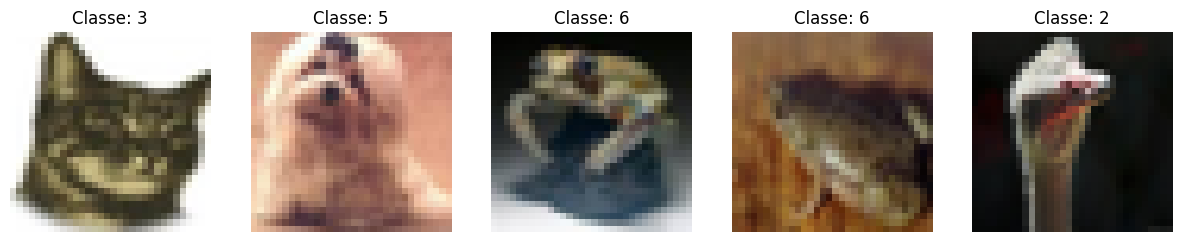

In [ ]:



x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_data = np.concatenate((x_train, x_test), axis=0)
y_data = np.concatenate((y_train, y_test), axis=0)

x_train, x_temp, y_train, y_temp = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


num_images = 5 
plt.figure(figsize=(15, 3))

for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_train[i])
    plt.title(f'Classe: {y_train[i][0]}')
    plt.axis('off')

plt.show()



In [ ]:

input = layers.Input(shape=(32, 32, 3))

# Encoder
x = layers.Conv2D(8, (3, 3), strides=1, activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(12, (3, 3), strides=1, activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(16, (3, 3), strides=1, activation="relu", padding="same")(x)

# Decoder
x = layers.UpSampling2D(size=(2, 2))(x)  
x = layers.Conv2DTranspose(12, (3, 3), activation="relu", padding="same")(x)
x = layers.UpSampling2D(size=(2, 2))(x)  
x = layers.Conv2DTranspose(3, (3, 3), activation="relu", padding="same")(x)

# Autoencoder model
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="mean_squared_error")
autoencoder.summary()


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 32, 32, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 16, 16, 12)     │           876 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 8, 8, 12)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 8, 8, 16)       │         1,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_14             │ (None, 16, 16, 12)     │         1,740 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 32, 32, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_15             │ (None, 32, 32, 3)      │           327 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,911 (19.18 KB)

 Trainable params: 4,911 (19.18 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = autoencoder.fit(
    x=x_train,
    y=x_train,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(x_val, x_val)
)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0059 - val_loss: 0.0059
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0057 - val_loss: 0.0057
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0055 - val_loss: 0.0055
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0052 - val_loss: 0.0051
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0051 - val_loss: 0.0051
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0050 - val_loss: 0.0053
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0049 - val_loss: 0.0049
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 10/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 11/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 12/20
375/375 ━━━━━━━━━━━━━━━━━━━━

Training Losses: [0.00586759764701128, 0.005623956676572561, 0.005427369382232428, 0.00530141219496727, 0.0051787300035357475, 0.005088951904326677, 0.004991013091057539, 0.004915241152048111, 0.00484100915491581, 0.0047816322185099125, 0.004727686755359173, 0.0046659973450005054, 0.004625754430890083, 0.0045930854976177216, 0.004538379143923521, 0.004505613818764687, 0.004479740280658007, 0.004443726036697626, 0.004422375466674566, 0.004389773588627577]
Validation Losses: [0.005853268317878246, 0.0056714559905231, 0.005458228290081024, 0.005236142780631781, 0.0051259007304906845, 0.005143892485648394, 0.005335906986147165, 0.00491548515856266, 0.00481099309399724, 0.004751944448798895, 0.004726685583591461, 0.004679492674767971, 0.004624801222234964, 0.004567403811961412, 0.004543854855000973, 0.004497773479670286, 0.004464091267436743, 0.004435522947460413, 0.004464952275156975, 0.004474937450140715]


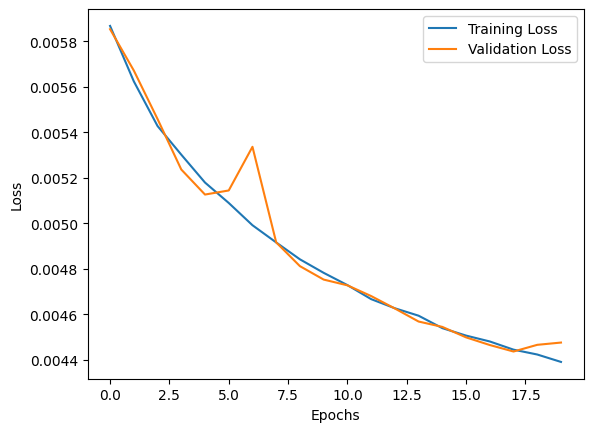

In [49]:
train_loss = history.history['loss']  
val_loss = history.history['val_loss']  

print("Training Losses:", train_loss)
print("Validation Losses:", val_loss)

plt.plot(history.epoch, train_loss, label='Training Loss')
plt.plot(history.epoch, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0861175].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.05883436..1.055752].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.15539414..1.0546796].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0970198].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1637216].


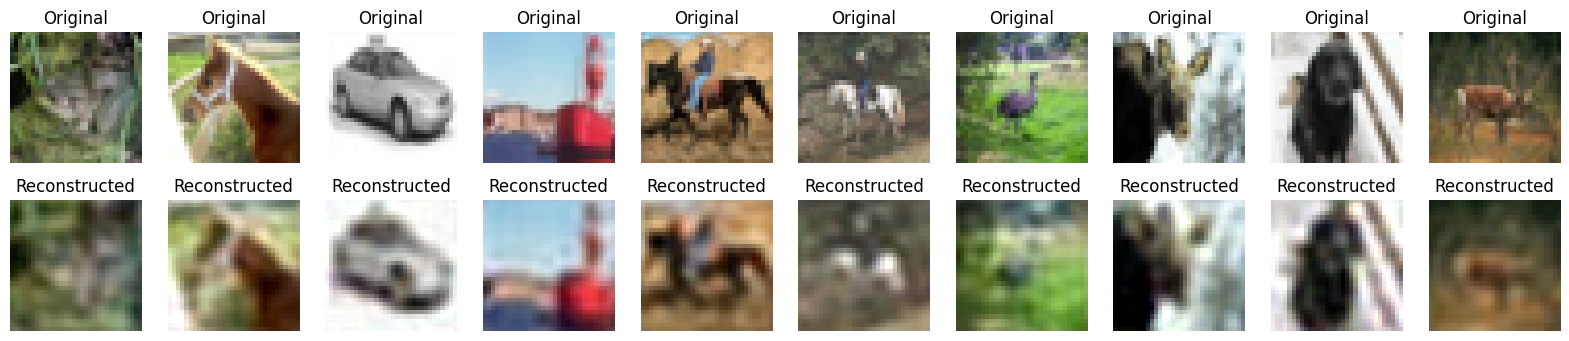

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [ ]:
import matplotlib.pyplot as plt

def display_images(original_images, reconstructed_images, n=10):

    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        ax.imshow(original_images[i])  
        ax.axis('off')
        ax.set_title('Original')
        ax = plt.subplot(2, n, i + 1 + n)
        ax.imshow(reconstructed_images[i])  
        ax.axis('off') 
        ax.set_title('Reconstructed')

    plt.show()

predictions = autoencoder.predict(x_test)

display_images(x_test, predictions, n=10)


predictions = autoencoder.predict(x_test)
